In [268]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil import parser
import random
import utilities
import os
from scipy.stats import gaussian_kde
import numpy as np
import pytz
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from scipy import stats

In [4]:
reload(utilities)

Tweet 1000 of 4491

Tweet 2000 of 4491

Tweet 3000 of 4491

Tweet 4000 of 4491



<module 'utilities' from 'utilities.pyc'>

In [5]:
metas = utilities.loadmetadata()

In [117]:
r = next(metas.iterrows())[40]

TypeError: 'generator' object has no attribute '__getitem__'

In [120]:
r = metas.iloc[40]

In [121]:
events, tweets = utilities.fullgame(r)

In [47]:
lenhalf = 20*60
amonth, aday = tweets['time'].iloc[0].month, tweets['time'].iloc[0].day
startgame = list(events[(events['Seconds'] == 0)]['WallClockTime'])[0]
endgame = list(events[(events['Seconds'] == 0)]['WallClockTime'])[-1]

startgame = startgame.replace(month = amonth, day = aday)
endgame = endgame.replace(month = amonth, day = aday)

lengame = (endgame - startgame).seconds
halfbegin = startgame + timedelta(seconds = lengame/2 - lenhalf/2)
halfend = startgame + timedelta(seconds = lengame/2 + lenhalf/2)

filt_tweets = tweets[(tweets['time'] <= halfbegin) | (tweets['time'] >= halfend)]

In [104]:
events.index = events['WallClockTime']

In [78]:
tweetf = tweets['sentnum'].groupby([tweets.index.hour, tweets.index.minute]).mean().to_frame()
eventf = events['Margin'].groupby([events.index.hour, events.index.minute]).mean().to_frame()
eventf['count'] = events['Margin'].groupby([events.index.hour, events.index.minute]).count().to_frame()

In [112]:
stats.linregress(joint['sentnum'].shift().dropna(), joint['Margin'].iloc[:-1])

LinregressResult(slope=2.1976209279547536, intercept=4.5768032368473399, rvalue=0.069831204922793308, pvalue=0.44278698372170167, stderr=2.8539678395431567)

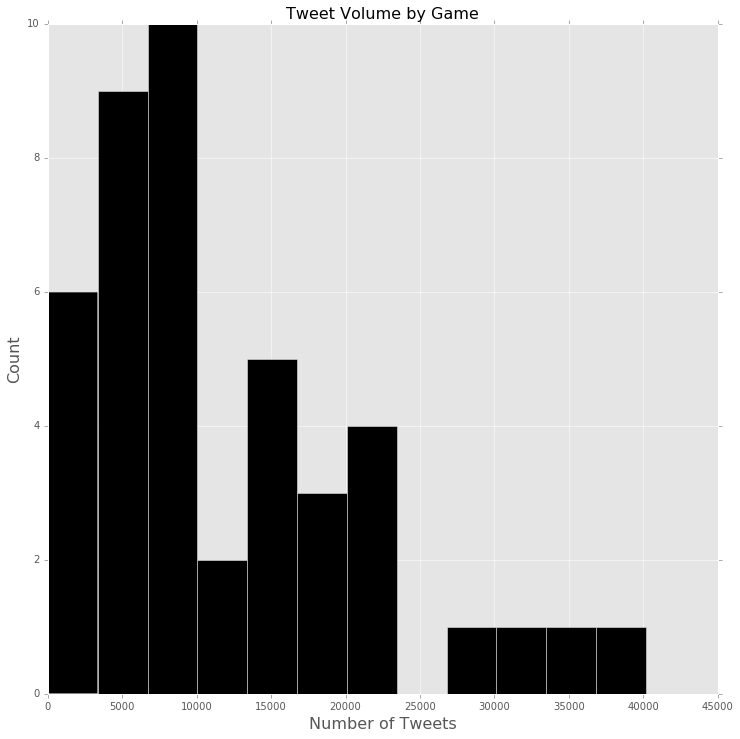

In [108]:
# Figure 3 generated 
files = os.listdir("../separated")
cleanfiles = [x for x in files if '_clean' in x]

gamedict = {}
for item in cleanfiles:
    df = pd.read_csv(item)
    gamedict[item.split("_clean")[0]] = len(df['time'])

agd = gamedict
agd['UNCVillanova'] = 0
fig = plt.figure(figsize=(12,12))
plt.hist(agd.values(), bins=12, color = 'black')
plt.title('Tweet Volume by Game', fontsize = 16)
plt.xlabel('Number of Tweets', fontsize = 16)
plt.ylabel('Count', fontsize = 16)  

In [165]:
# Write a simple function that converts the datetime to a "%H:%M" variable
def simpleconv(datetime):
    return str(datetime.hour) + ":" + str(datetime.minute)

def getgamemeta(gp1, gp2):
    gmdat = pd.read_csv("GameMetadata.csv")
    metadat = gmdat[((gmdat['Team1'] == gp1) | (gmdat['Team1'] == gp2)) & ((gmdat['Team2'] == gp1) | (gmdat['Team2'] == gp2))]
    eid = int(metadat['espn_id'].iloc[0])
    begin, end = datetime.strptime(metadat['Start'].iloc[0], '%H:%M'), datetime.strptime(metadat['End'].iloc[0], '%H:%M')
    lenhalf = 20*60
    htbegin = begin + timedelta(0, (end-begin).seconds/2 - lenhalf/2)
    htend = begin + timedelta(0,(end-begin).seconds/2 + lenhalf/2)
    
    return {'meta': metadat,
            'start': begin,
            'end': end,
            'htstart':htbegin, 
            'htend': htend} 

In [192]:
endid

Int64Index([72], dtype='int64')

In [253]:
# Figure 4 generated
r = metas.iloc[40]
events, tweets = utilities.fullgame(r)

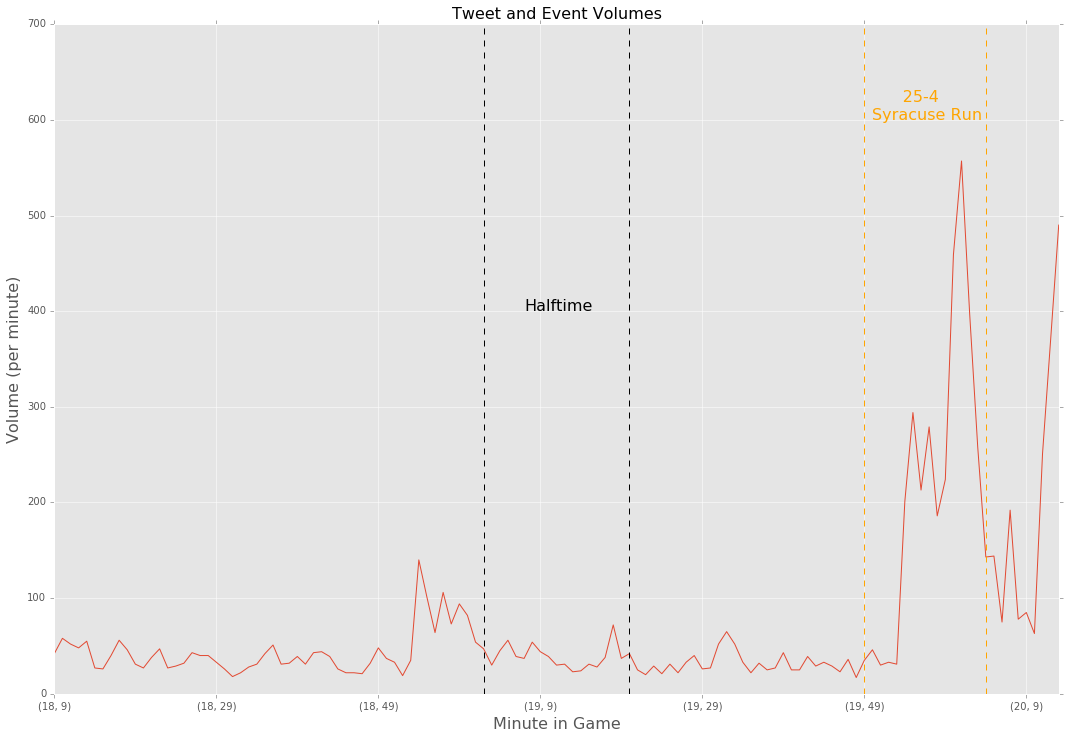

In [251]:
gamemeta = getgamemeta('Syracuse', 'Virginia')

td = tweets
td['time'] = td['time'].astype(str)
td.index = td['time'].map(lambda x : parser.parse(x) - timedelta(hours=4))
tweetsdf = td['time_chg'].groupby([td.index.hour,td.index.minute]).count().to_frame() # /twtotal
tweetsdf.columns = [['count']] #'MarginChange']] 
plt.figure(figsize = (18,12))
tweetsdf['count'].plot()

# run a basic regression
tweetsdf = tweetsdf.reset_index()
beginhour, beginminute = simpleconv(gamemeta['htstart']).split(':')
endhour, endminute = simpleconv(gamemeta['htend']).split(':')
tweetsdf[['level_0', 'level_1']] = tweetsdf[['level_0', 'level_1']].astype(str)
begid = tweetsdf[(tweetsdf['level_0'] == beginhour) & (tweetsdf['level_1'] == beginminute)].index
endid = tweetsdf[(tweetsdf['level_0'] == endhour) & (tweetsdf['level_1'] == endminute)].index
midid = tweetsdf[(tweetsdf['level_0'] == str(19)) & (tweetsdf['level_1'] == str(54))].index

plt.title('Tweet and Event Volumes', fontsize = 16)
plt.xlabel("Minute in Game", fontsize = 16)
plt.ylabel('Volume (per minute)', fontsize = 16)
plt.axvline(x=begid+1, color = 'black', ls='dashed')
plt.axvline(x=endid-1, color = 'black', ls='dashed')
plt.ylim((0,700))
plt.annotate('Halftime', xy=(((begid+endid)/2)[0]-4,str(400)), fontsize = 16)

# Numbers calculated manually from looking at box score
plt.axvline(x=100, color = 'orange', ls='dashed')
plt.axvline(x=115, color = 'orange', ls='dashed')
plt.annotate('      25-4 \nSyracuse Run', xy=((midid)[0]-4,str(600)), fontsize = 16, color = 'orange')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


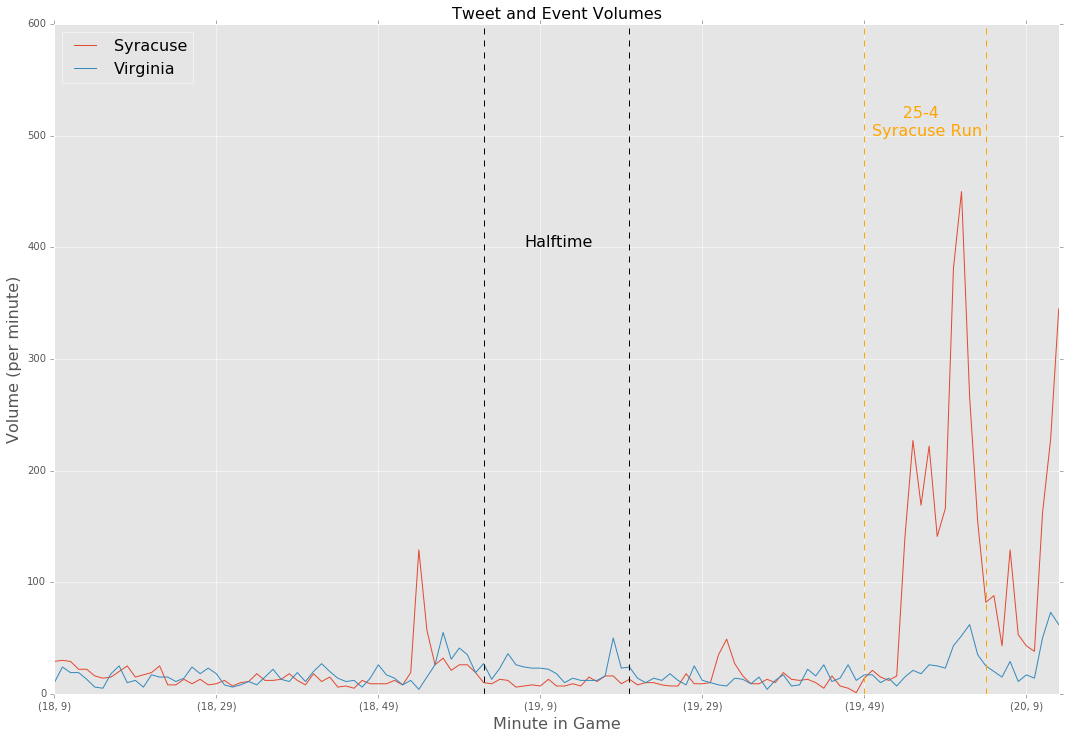

In [254]:
# Figure 5 generated
cuse = tweets[(tweets['Team1Indc'] == 1) & (tweets['Team2Indc'] == 0)].reset_index()
uva = tweets[(tweets['Team1Indc'] == 0) & (tweets['Team2Indc'] == 1)]
both = tweets[(tweets['Team1Indc'] == 1) & (tweets['Team2Indc'] == 1)]
neither = tweets[(tweets['Team1Indc'] == 0) & (tweets['Team2Indc'] == 0)]

cuse['time'] = cuse['time'].astype(str)
cuse.index = cuse['time'].map(lambda x : parser.parse(x) - timedelta(hours=4))
cusedf = cuse['time_chg'].groupby([cuse.index.hour,cuse.index.minute]).count().to_frame() # /twtotal
cusedf.columns = [['count']] #'MarginChange']] 

uva['time'] = uva['time'].astype(str)
uva.index = uva['time'].map(lambda x : parser.parse(x) - timedelta(hours=4))
uvadf = uva['time_chg'].groupby([uva.index.hour,uva.index.minute]).count().to_frame() # /twtotal
uvadf.columns = [['count']] #'MarginChange']] 

# run a basic regression
cusedf = cusedf.reset_index()
beginhour, beginminute = simpleconv(gamemeta['htstart']).split(':')
endhour, endminute = simpleconv(gamemeta['htend']).split(':')
cusedf[['level_0', 'level_1']] = cusedf[['level_0', 'level_1']].astype(str)
begid = cusedf[(cusedf['level_0'] == beginhour) & (cusedf['level_1'] == beginminute)].index
endid = cusedf[(cusedf['level_0'] == endhour) & (cusedf['level_1'] == endminute)].index
midid = tweetsdf[(tweetsdf['level_0'] == str(19)) & (tweetsdf['level_1'] == str(54))].index

plt.figure(figsize = (18,12))
cusedf['count'].plot()
uvadf['count'].plot()
plt.title('Tweet and Event Volumes', fontsize = 16)
plt.xlabel("Minute in Game", fontsize = 16)
plt.ylabel('Volume (per minute)', fontsize = 16)
plt.axvline(x=begid+1, color = 'black', ls='dashed')
plt.axvline(x=endid-1, color = 'black', ls='dashed')
plt.ylim((0,600))
plt.annotate('Halftime', xy=(((begid+endid)/2)[0]-4,str(400)), fontsize = 16)
plt.legend(['Syracuse', 'Virginia'], loc = 2, fontsize = 16)
plt.axvline(x=100, color = 'orange', ls='dashed')
plt.axvline(x=115, color = 'orange', ls='dashed')
plt.annotate('      25-4 \nSyracuse Run', xy=((midid)[0]-4,str(500)), fontsize = 16, color = 'orange')

In [352]:
# Figure 6
r = metas.iloc[40]
events, tweets = utilities.fullgame(r)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

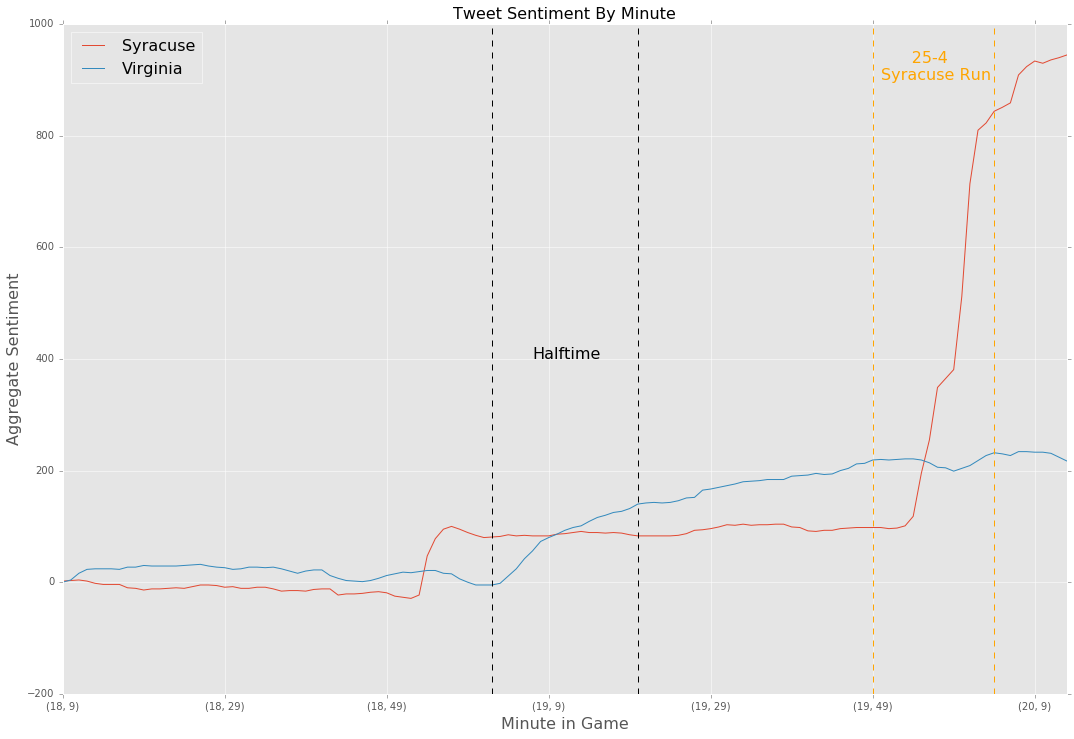

In [363]:
def sentcount(x):
    count = []
    for item in range(0, len(x)):
        subset = x[0:item]
        count.append(subset.count('positive') - 2*subset.count('negative'))
    return count

cuse = tweets[(tweets['Team1Indc'] == 1) & (tweets['Team2Indc'] == 0)].reset_index()
uva = tweets[(tweets['Team1Indc'] == 0) & (tweets['Team2Indc'] == 1)]

cuse['sentcount'] = sentcount(list(cuse['sentiment']))
uva['sentcount'] = sentcount(list(uva['sentiment']))

cuse['time'] = cuse['time'].astype(str)
cuse.index = cuse['time'].map(lambda x : parser.parse(x) - timedelta(hours=4))
cusedf = cuse['time_chg'].groupby([cuse.index.hour,cuse.index.minute]).count().to_frame() # /twtotal
cusedf.columns = [['count']] 

plt.figure(figsize = (18,12))
# cusedf['count'].plot(color = 'white')

cusedf = cusedf.reset_index()

cuse['hour'] = cuse.index.hour
cuse['minute'] = cuse.index.minute
cuse['hour_minute'] = cuse['hour']*100 + cuse['minute']

cuserelvsentcount = []
for val in cuse['hour_minute'].unique():
    hour, minute = int(str(val)[0:2]), int(str(val)[2:4])
    sent = np.max(cuse[(cuse['hour'] == hour) & (cuse['minute'] == minute)]['sentcount'])
    cuserelvsentcount.append(sent)
cusedf['SyracuseSent'] = cuserelvsentcount 

uva['time'] = uva['time'].astype(str)
uva.index = uva['time'].map(lambda x : parser.parse(x) - timedelta(hours=4))
uvadf = uva['time_chg'].groupby([uva.index.hour,uva.index.minute]).count().to_frame() # /twtotal
uvadf.columns = [['count']] 
uvadf = uvadf.reset_index()

uva['hour'] = uva.index.hour
uva['minute'] = uva.index.minute
uva['hour_minute'] = uva['hour']*100 + uva['minute']

uvarelvsentcount = []
for val in uva['hour_minute'].unique():
    hour, minute = int(str(val)[0:2]), int(str(val)[2:4])
    sent = np.max(uva[(uva['hour'] == hour) & (uva['minute'] == minute)]['sentcount'])
    uvarelvsentcount.append(sent)
uvadf['UVASent'] = uvarelvsentcount 

xdff = cusedf.groupby(['level_0', 'level_1']).mean()

xdff['SyracuseSent'].plot()
uvadf['UVASent'].plot()
plt.title('Tweet Sentiment By Minute', fontsize = 16)
plt.xlabel("Minute in Game", fontsize = 16)
plt.ylabel('Aggregate Sentiment', fontsize = 16)

beginhour, beginminute = simpleconv(gamemeta['htstart']).split(':')
endhour, endminute = simpleconv(gamemeta['htend']).split(':')
cusedf[['level_0', 'level_1']] = cusedf[['level_0', 'level_1']].astype(str)
begid = cusedf[(cusedf['level_0'] == beginhour) & (cusedf['level_1'] == beginminute)].index
endid = cusedf[(cusedf['level_0'] == endhour) & (cusedf['level_1'] == endminute)].index
midid = cusedf[(cusedf['level_0'] == str(19)) & (cusedf['level_1'] == str(54))].index

plt.axvline(x=begid+1, color = 'black', ls='dashed')
plt.axvline(x=endid-1, color = 'black', ls='dashed')
plt.annotate('Halftime', xy=(((begid+endid)/2)[0]-4,str(400)), fontsize = 16)
plt.legend(['Syracuse', 'Virginia'], loc = 2, fontsize = 16)
plt.axvline(x=100, color = 'orange', ls='dashed')
plt.axvline(x=115, color = 'orange', ls='dashed')
plt.annotate('      25-4 \nSyracuse Run', xy=((midid)[0]-4,str(900)), fontsize = 16, color = 'orange')

In [362]:
cusedf.groupby(['level_0', 'level_1']).mean()

count  SyracuseSent
level_0 level_1                     
18      10          30             3
        11          29             4
        12          22             2
        13          22            -2
        14          16            -4
        15          14            -4
        16          15            -4
        17          20           -10
        18          25           -11
        19          15           -14
        20          17           -12
        21          19           -12
        22          25           -11
        23           8           -10
        24           8           -11
        25          13            -8
        26           9            -5
        27          13            -5
        28           8            -6
        29           9            -9
        30          12            -8
        31           7           -11
        32          10           -11
        33          11            -9
        34          18            -9
        35          12           -12
        36          12           -16
        37          13           -15
        38          18           -15
        39          12           -16
...                ...           ...
19      49          14            98
        5           12            83
        50          21            98
        51          15            96
        52          12            97
        53          16           101
        54         139           118
        55         227           195
        56         169           255
        57         222           349
        58         141           365
        59         166           381
        6            6            84
        7            7            83
        8            8            83
        9            7            83
20      0          381           512
        1          450           714
        10          38           930
        11         162           936
        12         228           940
        13         345           945
        2          266           810
        3          154           823
        4           82           844
        5           88           851
        6           43           859
        7          129           909
        8           53           924
        9           43           934

[125 rows x 2 columns]

In [258]:
cuse['sentiment'].value_counts()

neutral       2342
positive      1759
irrelevant     628
negative       410
Name: sentiment, dtype: int64